### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

<Axes: >

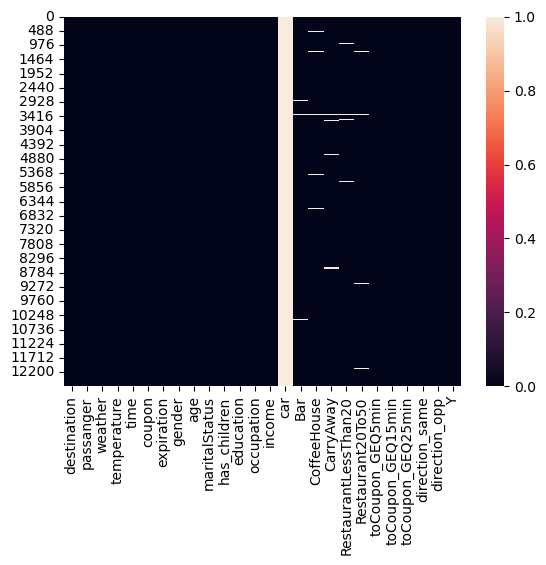

In [10]:
print(data.describe())
print(data.isna().sum())
sns.heatmap(data.isna())

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
pd.set_option('display.max_columns', None)
#data['car'].unique()
# 'car' column almost has no filled values. Existing values are also barely informative -> dropping the whole column
df = data.drop('car', axis = 1)
df.head()

# All the columns that store information about driver's frequency of attending various establishment types also have null values,
# but there are not as many of them and the rest of the information about drivers is still useful -> leaving them in

df.isna().sum() # shows Bar - 107, CoffeeHouse - 217, CarryAway - 151, RestaurantLessThan20 - 130, Restaurant20To50 - 189

df[(df['Bar'].isna() == True) &
    (df['CoffeeHouse'].isna() == True) & 
    (df['CarryAway'].isna() == True) &
    (df['RestaurantLessThan20'].isna() == True) &
    (df['Restaurant20To50'].isna() == True)].info() #gives dimension of 42 rows

# in the end of the day we didn't drop any rows, only dropped a column -> answer to question #4 below is not affected

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 517 to 3359
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           42 non-null     object
 1   passanger             42 non-null     object
 2   weather               42 non-null     object
 3   temperature           42 non-null     int64 
 4   time                  42 non-null     object
 5   coupon                42 non-null     object
 6   expiration            42 non-null     object
 7   gender                42 non-null     object
 8   age                   42 non-null     object
 9   maritalStatus         42 non-null     object
 10  has_children          42 non-null     int64 
 11  education             42 non-null     object
 12  occupation            42 non-null     object
 13  income                42 non-null     object
 14  Bar                   0 non-null      object
 15  CoffeeHouse           0 non-null      objec

4. What proportion of the total observations chose to accept the coupon?



In [14]:
# It's 56.84%
print(df['Y'].unique())
df['Y'].describe()

[1 0]


count    12684.000000
mean         0.568433
std          0.495314
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

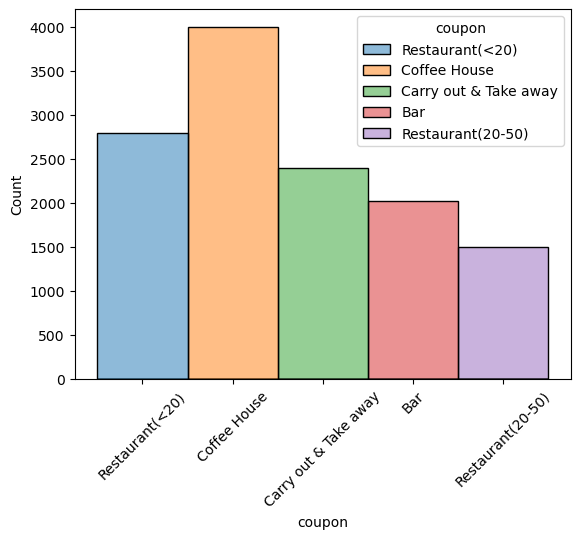

In [16]:
#df['coupon'].unique()

# I found resulting bar plots not informative at all, so went with histogram
sns.histplot(x = df['coupon'], hue = df['coupon'])
plt.xticks(rotation = 45)
plt.show()

6. Use a histogram to visualize the temperature column.

([<matplotlib.axis.XTick at 0x1354717c0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(30, 0, '30'),
  Text(55, 0, '55'),
  Text(80, 0, '80'),
  Text(105, 0, '105')])

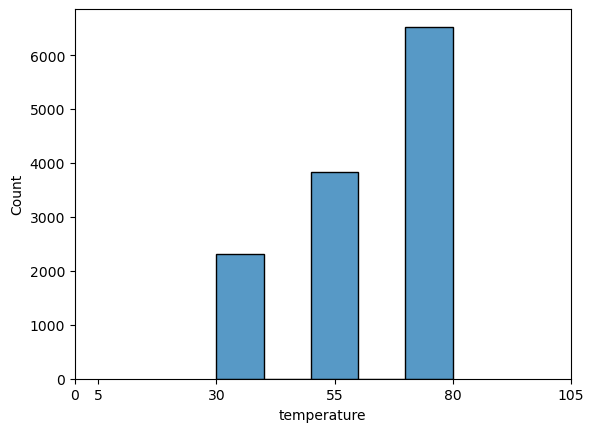

In [18]:
#print(df['temperature'].unique())
sns.histplot(x = df['temperature'], 
             binwidth = 10
            )
plt.xticks([0, 5, 30, 55, 80, 105])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
# Subsetting to df that only analyzes Bar coupons
print(df['coupon'].unique())
dfc = df[df['coupon'] == 'Bar']
print(dfc['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['Bar']


2. What proportion of bar coupons were accepted?


In [22]:
#It's 41%:
dfc['Y'].describe()

count    2017.000000
mean        0.410015
std         0.491958
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


/var/folders/s8/ztsv3sgx5mg6ph7qj06v4pxr0000gn/T/ipykernel_87735/582310612.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(attendance_order)


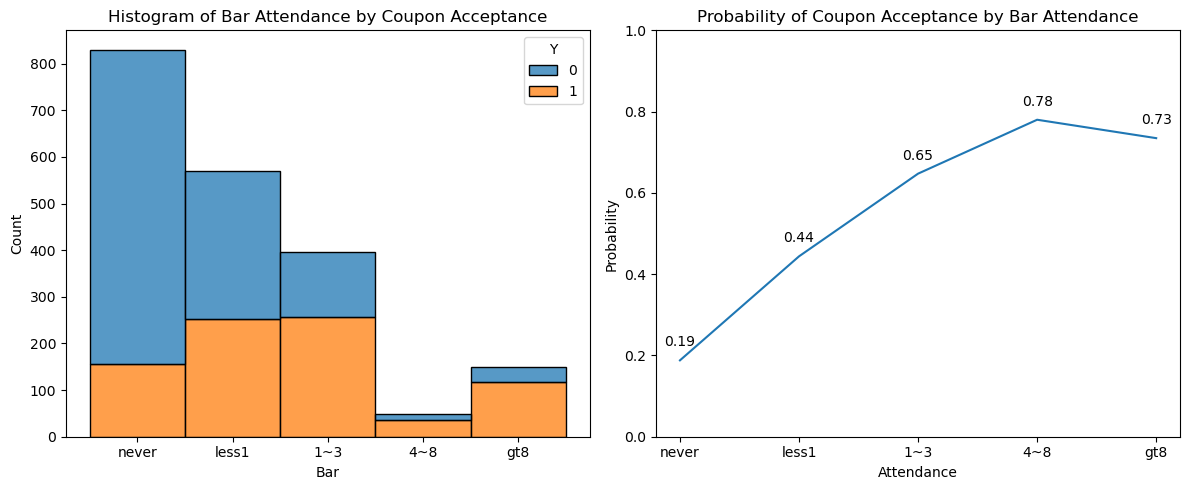

In [24]:
# Simulating the 'accepted_perc' data creation from dfc
temp = dfc.groupby('Bar')['Y'].sum() / dfc.groupby('Bar')['Y'].count()

# Converting to DataFrame and renaming indices into more informative ones
accepted_perc = pd.DataFrame({
    'Attendance': temp.index,
    'Probability': temp.values
})

# Defining the correct category order and ensure it's categorical
attendance_order =  ['never', 'less1', '1~3', '4~8', 'gt8']
accepted_perc['Attendance'] = pd.Categorical(accepted_perc['Attendance'], categories = attendance_order, ordered = True)

# Converting 'Bar' in dfc to categorical with specified order (this line ensures proper x-axis ordering)
dfc.loc[:, 'Bar'] = pd.Categorical(dfc['Bar'], categories = attendance_order, ordered = True)


# Setting up subplots for histogram and line plot side by side
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Histogram on the first subplot (with discrete=True to handle categorical x-axis)
sns.histplot(data = dfc, x = 'Bar', hue = 'Y', multiple = 'stack', ax = axes[0], discrete=True)
axes[0].set_title("Histogram of Bar Attendance by Coupon Acceptance")
axes[0].set_xticklabels(attendance_order)

# Line plot on the second subplot
sns.lineplot(data = accepted_perc, x = 'Attendance', y = 'Probability', ax = axes[1])
axes[1].set_title("Probability of Coupon Acceptance by Bar Attendance")
axes[1].set(ylim = (0, 1))  # Adjusting y-axis limits to 0 and 1 to reflect probability boundaries better

# Annotating the values on the line chart, ensuring they don't touch the chart
for x, y in zip(accepted_perc['Attendance'], accepted_perc['Probability']):
    axes[1].annotate(f'{y:.2f}', xy = (x, y), xytext = (0, 10), textcoords = 'offset points', ha = 'center')

# Set layout and show the plot
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Printing unique values of 'age'
print(dfc['age'].unique())

# Subsetting those who go to a bar more than once a month and are above 21
bar_hoppers_above21 = dfc.loc[(~dfc['age'].isin(['21', 'below21'])) & (dfc['Bar'] != 'never') & (dfc['Bar'] != 'less1')]
print(bar_hoppers_above21['Y'].describe().values[1])

# Subsetting all the rest
not_bar_hoppers_above21 = dfc.loc[~((~dfc['age'].isin(['21', 'below21'])) & (dfc['Bar'] != 'never') & (dfc['Bar'] != 'less1'))]
print(not_bar_hoppers_above21['Y'].describe().values[1])

# Adding those probabilities of acceptance to our already existing dataframe accepted_perc
addl_perc_temp = pd.DataFrame({
    'Attendance': ['bar_hoppers_above21', 'not_bar_hoppers_above21'],
    'Probability': [bar_hoppers_above21['Y'].describe().values[1],
                    not_bar_hoppers_above21['Y'].describe().values[1]]
})

# Providing more meaningful names for those values of Attendance in the original dataframe
accepted_perc['Attendance'] = ['1~3_times_bar_all', '4~8_times_bar_all', 'more_than_8_times_bar_all', 'less_than_once_bar_all', 'never_bar_all']

# Merging the DataFrames
accepted_perc_comb = pd.concat([accepted_perc, addl_perc_temp], ignore_index = True)

# Renaming columns to reflect the content meaningfully
accepted_perc_comb.rename(columns = {'Attendance': 'Subgroup of recipients',
                                     'Probability': 'Probability of accepting bar coupon'}, 
                          inplace = True)

# Rewriting the initial df
accepted_perc = accepted_perc_comb

# Print DataFrame to ensure columns are renamed correctly
print(accepted_perc.head())

# Changing the order
accepted_perc = accepted_perc.sort_values(by = 'Subgroup of recipients',
                                          key = lambda col: pd.Categorical(col, 
                                                                           categories = ['never_bar_all',
                                                                                         'less_than_once_bar_all',
                                                                                         '1~3_times_bar_all',
                                                                                         '4~8_times_bar_all',
                                                                                         'more_than_8_times_bar_all',
                                                                                         'bar_hoppers_above21',
                                                                                         'not_bar_hoppers_above21'],
                                                                           ordered = True))

# Displaying the result
print(accepted_perc)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
0.6818181818181818
0.33417882054533926
      Subgroup of recipients  Probability of accepting bar coupon
0          1~3_times_bar_all                             0.647355
1          4~8_times_bar_all                             0.780000
2  more_than_8_times_bar_all                             0.734694
3     less_than_once_bar_all                             0.443860
4              never_bar_all                             0.187952
      Subgroup of recipients  Probability of accepting bar coupon
4              never_bar_all                             0.187952
3     less_than_once_bar_all                             0.443860
0          1~3_times_bar_all                             0.647355
1          4~8_times_bar_all                             0.780000
2  more_than_8_times_bar_all                             0.734694
5        bar_hoppers_above21                             0.681818
6    not_bar_hoppers_above21                        

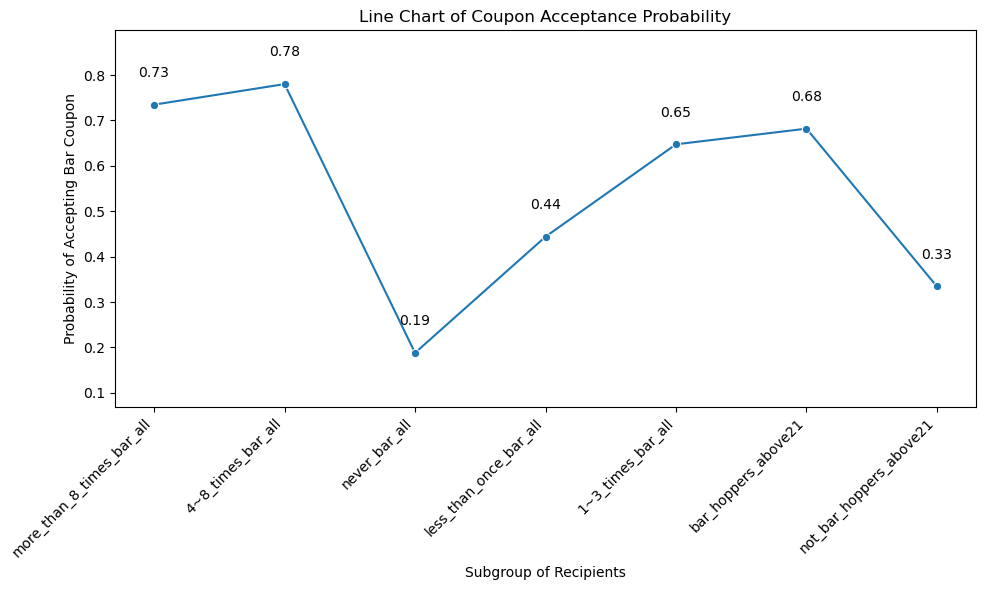

In [27]:
# Reordering accepted_perc dataframe, so that the order of subgroups is more logical
new_order = [4, 3, 0, 1, 2, 5, 6]

# Reordering the dataframe based on the new order
accepted_perc = accepted_perc.iloc[new_order].reset_index(drop = True)

# Plotting the line chart with all assessed subgroups of coupon recepients
plt.figure(figsize = (10, 6))
ax = sns.lineplot(
    data = accepted_perc, 
    x = 'Subgroup of recipients', 
    y = 'Probability of accepting bar coupon',
    marker = "o"
)

# Annotating each point with the y-value
for x, y in zip(accepted_perc['Subgroup of recipients'], accepted_perc['Probability of accepting bar coupon']):
    ax.annotate(f'{y:.2f}', xy = (x, y), xytext = (0, 20), textcoords = 'offset points', ha = 'center', clip_on = False)

# Adjusting margins to prevent labels from being clipped
plt.margins(y = 0.2)

# Rotating the x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right')

# Setting the title and labels
ax.set_title('Line Chart of Coupon Acceptance Probability')
ax.set_xlabel('Subgroup of Recipients')
ax.set_ylabel('Probability of Accepting Bar Coupon')

# Set a tighter layout and showing the plot
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
# Deriving and printing unique values for the categories

print('Occupations:')
i = 1
for occ in df['occupation'].unique():
    print(str(i) + ". " + occ)
    i += 1
print('------------')
print('Incomes:')
i = 1
for inc in df['income'].unique():
    print(str(i) + ". " + inc)
    i += 1
print('------------')
print('Passengers:')
i = 1
for pas in df['passanger'].unique():
    print(str(i) + ". " + pas)
    i += 1
print('------------')

Occupations:
1. Unemployed
2. Architecture & Engineering
3. Student
4. Education&Training&Library
5. Healthcare Support
6. Healthcare Practitioners & Technical
7. Sales & Related
8. Management
9. Arts Design Entertainment Sports & Media
10. Computer & Mathematical
11. Life Physical Social Science
12. Personal Care & Service
13. Community & Social Services
14. Office & Administrative Support
15. Construction & Extraction
16. Legal
17. Retired
18. Installation Maintenance & Repair
19. Transportation & Material Moving
20. Business & Financial
21. Protective Service
22. Food Preparation & Serving Related
23. Production Occupations
24. Building & Grounds Cleaning & Maintenance
25. Farming Fishing & Forestry
------------
Incomes:
1. $37500 - $49999
2. $62500 - $74999
3. $12500 - $24999
4. $75000 - $87499
5. $50000 - $62499
6. $25000 - $37499
7. $100000 or More
8. $87500 - $99999
9. Less than $12500
------------
Passengers:
1. Alone
2. Friend(s)
3. Kid(s)
4. Partner
------------


In [30]:
bar_attend_no_kids_in_car_not_fff = dfc.loc[(dfc['passanger'] != 'Alone') & 
                                            (dfc['passanger'] != 'Kid(s)') & 
                                            (dfc['Bar'] != 'never') &
                                            (dfc['Bar'] != 'less1') &
                                            (dfc['occupation'] != 'Farming Fishing & Forestry')]

bar_attend_no_kids_in_car_not_fff.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,1
224,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,0,0,0,1,0
227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,1,0,0,1,1


In [31]:
# Calculating percentage of accepting the coupon
bar_attend_no_kids_in_car_not_fff['Y'].describe().values[2]

0.4561079184639418

In [32]:
# Tracking in the dataframe
addl_perc_temp = pd.DataFrame({
    'Subgroup of recipients': ['bar_attend_no_kids_in_car_not_fff'],
    'Probability of accepting bar coupon': [bar_attend_no_kids_in_car_not_fff['Y'].describe().values[1]]
})

accepted_perc_comb = pd.concat([accepted_perc, addl_perc_temp], ignore_index=True)
accepted_perc = accepted_perc_comb
accepted_perc

,Subgroup of recipients,Probability of accepting bar coupon
0,more_than_8_times_bar_all,0.734694
1,4~8_times_bar_all,0.780000
2,never_bar_all,0.187952
3,less_than_once_bar_all,0.443860
4,1~3_times_bar_all,0.647355
5,bar_hoppers_above21,0.681818
6,not_bar_hoppers_above21,0.334179
7,bar_attend_no_kids_in_car_not_fff,0.707317


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [34]:
# Checking marital status unique values
print('maritalStatus:')
i = 1
for ms in df['maritalStatus'].unique():
    print(str(i) + ". " + ms)
    i += 1
print('------------')

maritalStatus:
1. Unmarried partner
2. Single
3. Married partner
4. Divorced
5. Widowed
------------


In [35]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_attend_no_kids_in_car_not_widowed = dfc.loc[(dfc['passanger'] != 'Alone') & \
                                                (dfc['passanger'] != 'Kid(s)') & \
                                                (dfc['Bar'] != 'never') & \
                                                (dfc['Bar'] != 'less1') & \
                                                (dfc['maritalStatus'] != 'Widowed')]
print(bar_attend_no_kids_in_car_not_widowed.info())
print('------------')

# go to bars more than once a month and are under the age of 30
bar_attend_under_30 = dfc.loc[(dfc['age'].isin(['under21', '21', '26'])) & \
                              (dfc['Bar'] != 'never') & \
                              (dfc['Bar'] != 'less1')]
print(bar_attend_under_30.info())
print('------------')

# go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_rest_crawl_income_less_than_50 = dfc.loc[(dfc['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
                                               (dfc['income'].isin(['Less than $12500',
                                                                    '$12500 - $24999',
                                                                    '$25000 - $37499',
                                                                    '$37500 - $49999']))]
print(cheap_rest_crawl_income_less_than_50.info())

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 90 to 12526
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           205 non-null    object
 1   passanger             205 non-null    object
 2   weather               205 non-null    object
 3   temperature           205 non-null    int64 
 4   time                  205 non-null    object
 5   coupon                205 non-null    object
 6   expiration            205 non-null    object
 7   gender                205 non-null    object
 8   age                   205 non-null    object
 9   maritalStatus         205 non-null    object
 10  has_children          205 non-null    int64 
 11  education             205 non-null    object
 12  occupation            205 non-null    object
 13  income                205 non-null    object
 14  Bar                   195 non-null    object
 15  CoffeeHouse           195 non-null    obje

In [36]:
print(cheap_rest_crawl_income_less_than_50['Y'].describe().values[1])
print(bar_attend_no_kids_in_car_not_widowed['Y'].describe().values[1])
print(bar_attend_under_30['Y'].describe().values[1])

0.45348837209302323
0.7073170731707317
0.7315634218289085


In [37]:
# Adding these groups to the tracking df
addl_perc_temp = pd.DataFrame({
    'Subgroup of recipients': ['cheap_rest_crawl_income_less_than_50', 'bar_attend_no_kids_in_car_not_widowed', 'bar_attend_under_30'],
    'Probability of accepting bar coupon': [cheap_rest_crawl_income_less_than_50['Y'].describe().values[1], 
                                            bar_attend_no_kids_in_car_not_widowed['Y'].describe().values[1],
                                            bar_attend_under_30['Y'].describe().values[1]]
})

accepted_perc_comb = pd.concat([accepted_perc, addl_perc_temp], ignore_index = True)
accepted_perc = accepted_perc_comb
accepted_perc

,Subgroup of recipients,Probability of accepting bar coupon
0,more_than_8_times_bar_all,0.734694
1,4~8_times_bar_all,0.780000
2,never_bar_all,0.187952
3,less_than_once_bar_all,0.443860
4,1~3_times_bar_all,0.647355
5,bar_hoppers_above21,0.681818
6,not_bar_hoppers_above21,0.334179
7,bar_attend_no_kids_in_car_not_fff,0.707317
8,cheap_rest_crawl_income_less_than_50,0.453488
9,bar_attend_no_kids_in_car_not_widowed,0.707317


In [38]:
# Now merging those 3 DFs as the task is to get OR percentage
task6group = pd.concat([cheap_rest_crawl_income_less_than_50, 
                        bar_attend_no_kids_in_car_not_widowed, 
                        bar_attend_under_30], 
                       ignore_index = True)
print(task6group.info())

# As these subsets intersect, sropping duplicates
task6group = task6group.drop_duplicates()
print(task6group.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           888 non-null    object
 1   passanger             888 non-null    object
 2   weather               888 non-null    object
 3   temperature           888 non-null    int64 
 4   time                  888 non-null    object
 5   coupon                888 non-null    object
 6   expiration            888 non-null    object
 7   gender                888 non-null    object
 8   age                   888 non-null    object
 9   maritalStatus         888 non-null    object
 10  has_children          888 non-null    int64 
 11  education             888 non-null    object
 12  occupation            888 non-null    object
 13  income                888 non-null    object
 14  Bar                   869 non-null    object
 15  CoffeeHouse           868 non-null    ob

In [39]:
# Adding to tracking df
addl_perc_temp = pd.DataFrame({
    'Subgroup of recipients': ['task6group'],
    'Probability of accepting bar coupon': [task6group['Y'].describe().values[1]]})

accepted_perc_comb = pd.concat([accepted_perc, addl_perc_temp], ignore_index = True)
accepted_perc = accepted_perc_comb
accepted_perc

,Subgroup of recipients,Probability of accepting bar coupon
0,more_than_8_times_bar_all,0.734694
1,4~8_times_bar_all,0.780000
2,never_bar_all,0.187952
3,less_than_once_bar_all,0.443860
4,1~3_times_bar_all,0.647355
5,bar_hoppers_above21,0.681818
6,not_bar_hoppers_above21,0.334179
7,bar_attend_no_kids_in_car_not_fff,0.707317
8,cheap_rest_crawl_income_less_than_50,0.453488
9,bar_attend_no_kids_in_car_not_widowed,0.707317


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [41]:
# 1. Going to a bar at least once a month is a good predictor of coupon acceptance
# 2. Having kids in the car decreases probability of accepting the coupon
# 3. People with lower income (that correlates with going to cheaper restaurants) tend to use coupons more
# 4. Not being in Farming, Fishing & Forestry or not being widowed does not change statistcial probability of acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

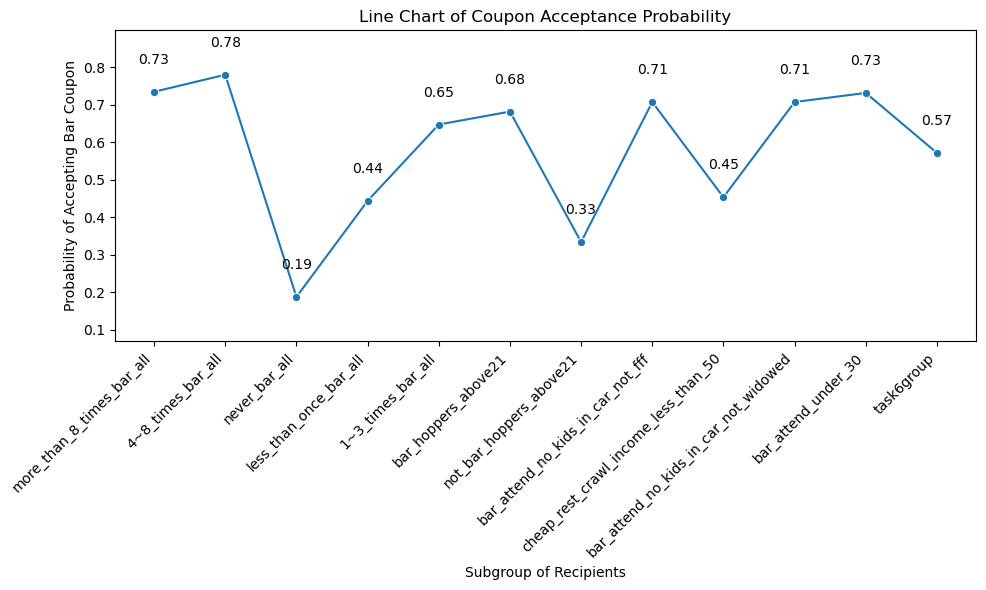

In [43]:
# Redefining and replotting bar coupon acceptance chart
bar_coupon_accept = accepted_perc

# Plotting the line chart with all assessed subgroups of coupon recepients
plt.figure(figsize = (10, 6))
ax = sns.lineplot(
    data = bar_coupon_accept, 
    x = 'Subgroup of recipients', 
    y = 'Probability of accepting bar coupon',
    marker = "o"
)

# Annotating each point with the y-value
for x, y in zip(bar_coupon_accept['Subgroup of recipients'], bar_coupon_accept['Probability of accepting bar coupon']):
    ax.annotate(f'{y:.2f}', xy = (x, y), xytext = (0, 20), textcoords = 'offset points', ha = 'center', clip_on = False)

# Adjusting margins to prevent labels from being clipped
plt.margins(y = 0.2)  # Adds space at the top of the plot to avoid clipping

# Rotating the x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right')

# Setting the title and labels
ax.set_title('Line Chart of Coupon Acceptance Probability')
ax.set_xlabel('Subgroup of Recipients')
ax.set_ylabel('Probability of Accepting Bar Coupon')

# Setting a tighter layout and showing the plot
plt.tight_layout()
plt.show()

In [44]:
# Subsetting data frames for each of the separate categories, since 5 types of coupons will likely have meaningfully different predictors
# We have explored the "Bar" coupons subset already -> leaving only 4 other ones
df_cr = df[df['coupon'] == 'Restaurant(<20)']
df_er = df[df['coupon'] == 'Restaurant(20-50)']
df_ch = df[df['coupon'] == 'Coffee House']
df_ct = df[df['coupon'] == 'Carry out & Take away']

In [45]:
print(df_cr.describe()['Y'].values[1])
print(df_er.describe()['Y'].values[1])
print(df_ch.describe()['Y'].values[1])
print(df_ct.describe()['Y'].values[1])

0.7071069633883704
0.4410187667560322
0.49924924924924924
0.7354784788967823


In [46]:
# Checking that all the unique values in the columns are the same
print(df_cr['RestaurantLessThan20'].unique())
print(df_er['Restaurant20To50'].unique())
print(df_ch['CoffeeHouse'].unique())
print(df_ct['CarryAway'].unique())

['4~8' '1~3' 'less1' 'gt8' nan 'never']
['1~3' 'less1' 'never' 'gt8' '4~8' nan]
['never' 'less1' '4~8' '1~3' 'gt8' nan]
[nan '4~8' '1~3' 'gt8' 'less1' 'never']


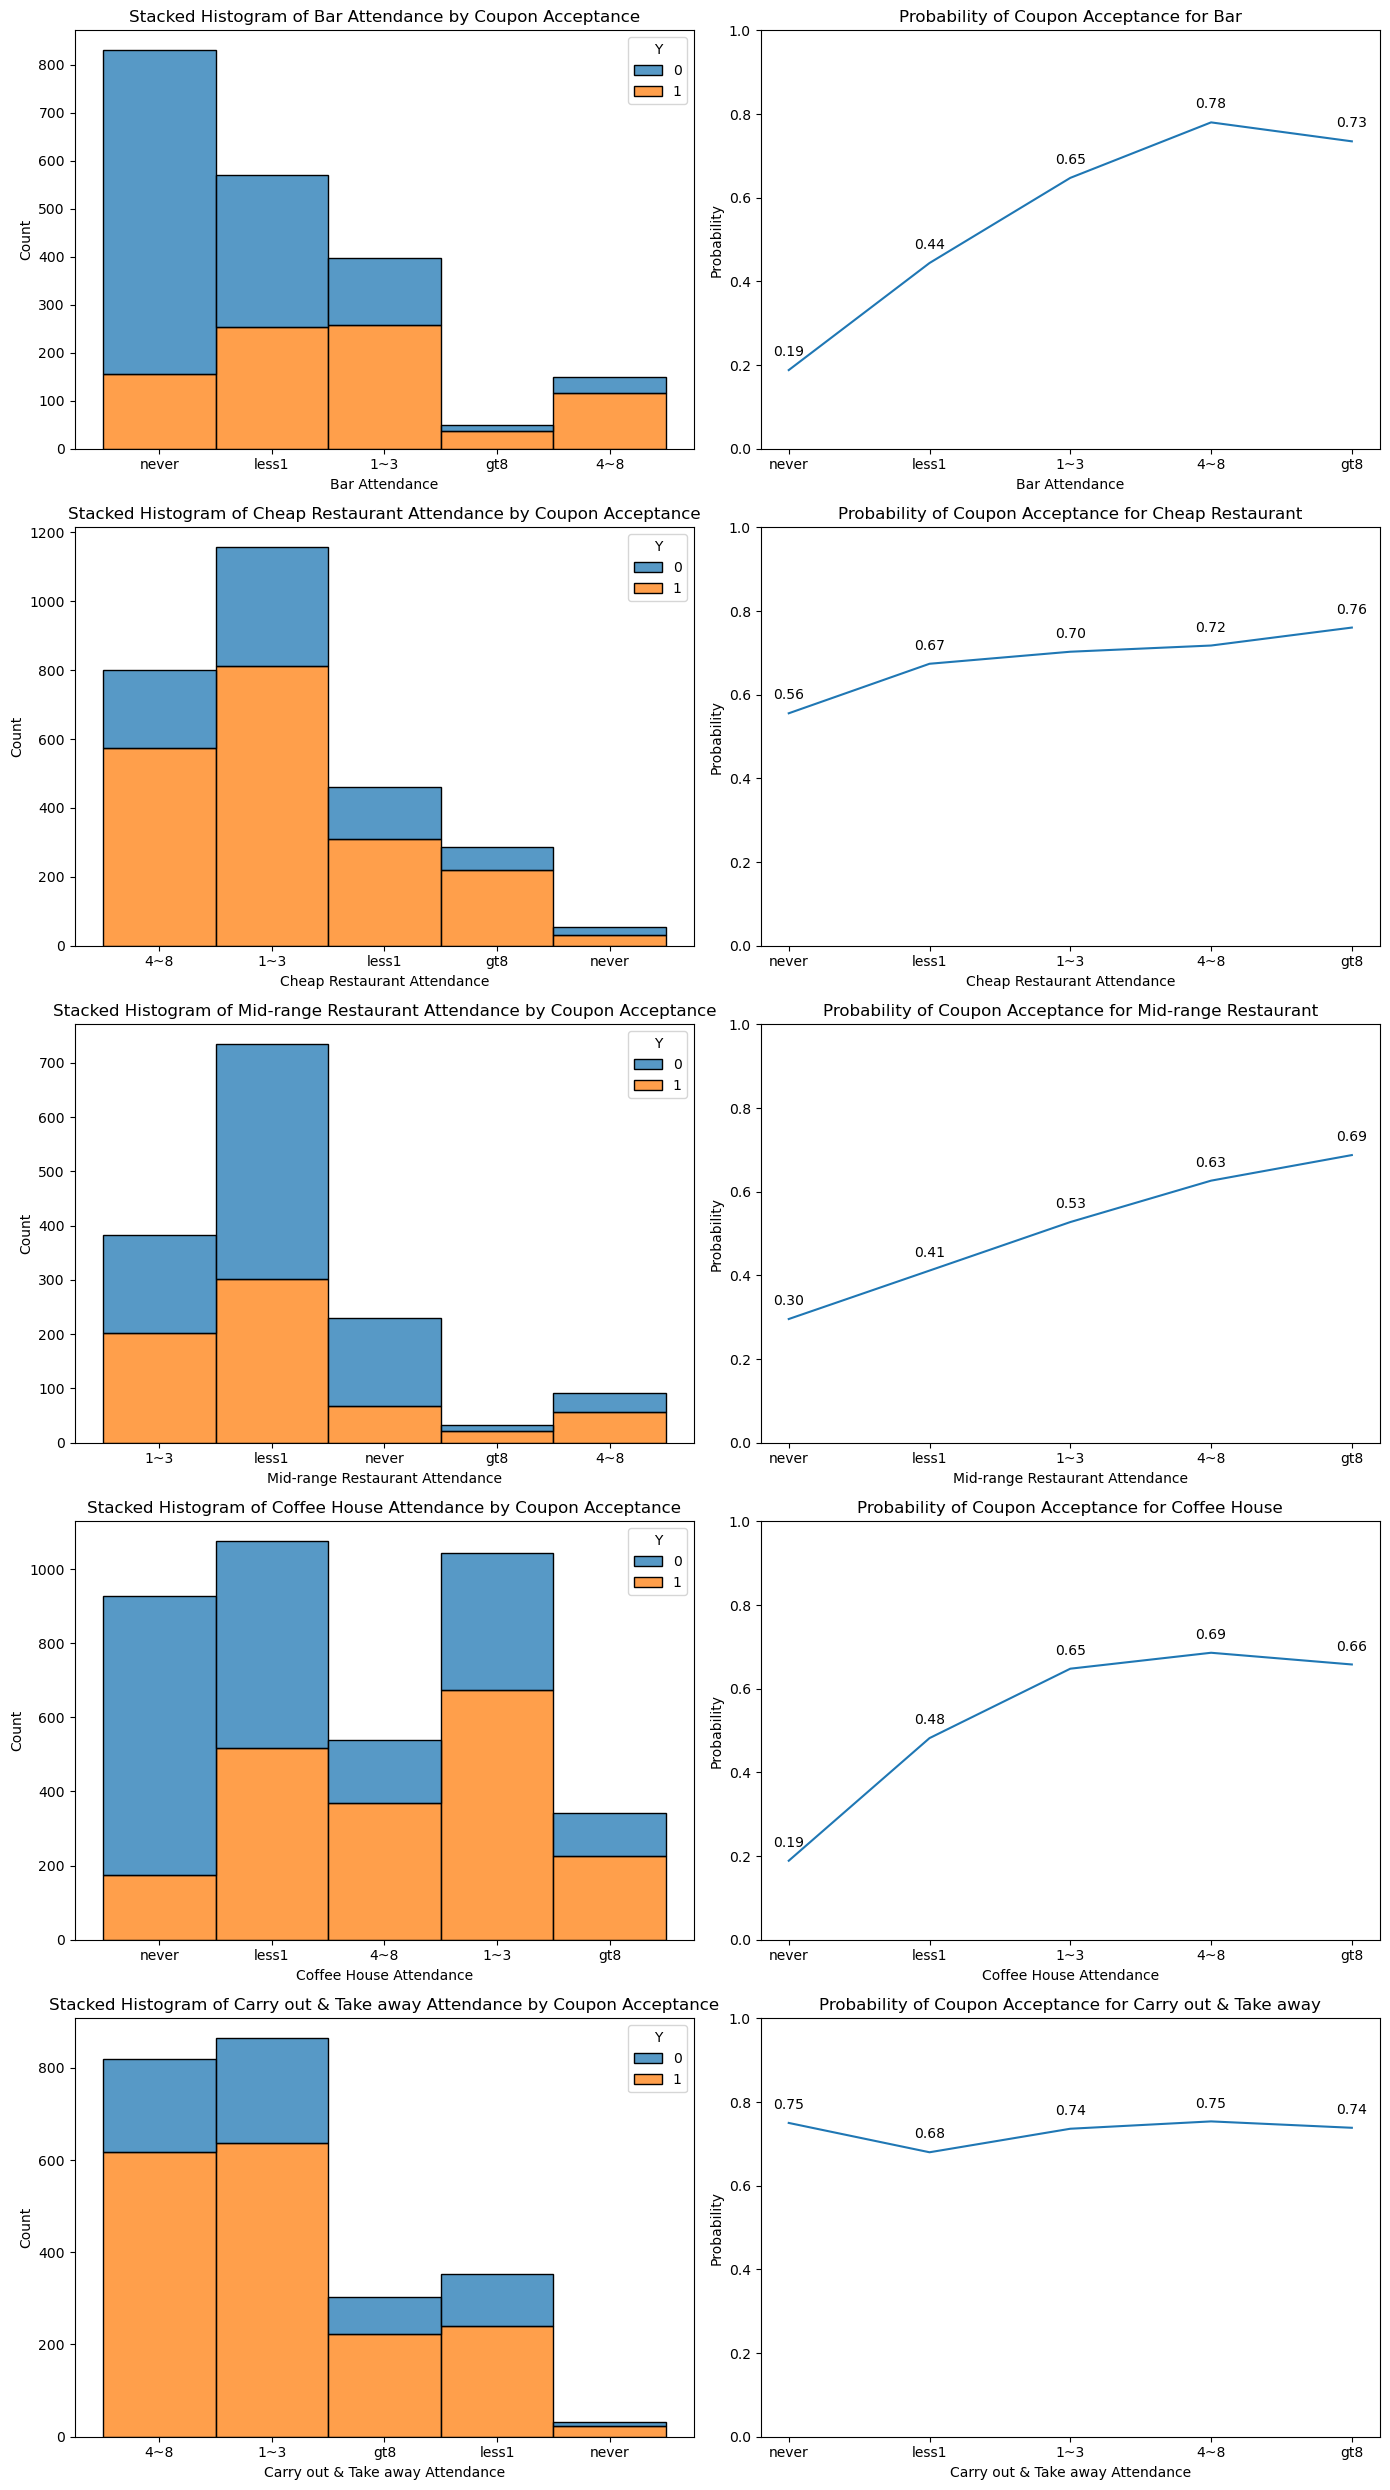

In [47]:
# Building plots with each respective dataframe including already explored "Bar" dataframe (dfc)

# Defining the subsets with new names for each coupon type and the corresponding column names for X-axis
df_list = [
    ('Bar', dfc, 'Bar'),
    ('Cheap Restaurant', df_cr, 'RestaurantLessThan20'),
    ('Mid-range Restaurant', df_er, 'Restaurant20To50'),
    ('Coffee House', df_ch, 'CoffeeHouse'),
    ('Carry out & Take away', df_ct, 'CarryAway')
]

# Creating the large 5x2 figure for 5 coupon types
fig, axes = plt.subplots(5, 2, figsize = (14, 25))  # 5 rows and 2 columns

# Looping through the dataframes and plots
for i, (coupon_type, df_subset, x_col) in enumerate(df_list):
    
    # Simulating the 'accepted_perc' data creation for each df_subset based on the appropriate column (x_col)
    temp = df_subset.groupby(x_col)['Y'].sum() / df_subset.groupby(x_col)['Y'].count()
    accepted_perc = pd.DataFrame({
        'Attendance': temp.index,
        'Probability': temp.values
    })
    
    # Setting the correct categorical ordering for both histplot and line plot if x_col has attendance categories
    if x_col in ['Bar', 'RestaurantLessThan20', 'Restaurant20To50', 'CoffeeHouse', 'CarryAway']:
        accepted_perc['Attendance'] = pd.Categorical(accepted_perc['Attendance'], categories = attendance_order, ordered = True) # attendance_order has been defined already as := ['never', 'less1', '1~3', '4~8', 'gt8']
        df_subset.loc[:, x_col] = pd.Categorical(df_subset[x_col], categories = attendance_order, ordered = True)  # Fix applied here
    
    # First plot: Stacked histogram of attendance by coupon acceptance
    sns.histplot(data = df_subset, x = x_col, hue = 'Y', multiple = 'stack', ax = axes[i, 0])
    axes[i, 0].set_title(f"Stacked Histogram of {coupon_type} Attendance by Coupon Acceptance")
    axes[i, 0].set_xlabel(f'{coupon_type} Attendance')
    axes[i, 0].set_ylabel('Count')
    
    # Second plot: Line plot of probability of coupon acceptance by attendance
    sns.lineplot(data = accepted_perc, x = 'Attendance', y = 'Probability', ax = axes[i, 1])
    axes[i, 1].set_title(f"Probability of Coupon Acceptance for {coupon_type}")
    axes[i, 1].set(ylim = (0, 1))
    axes[i, 1].set_xlabel(f'{coupon_type} Attendance')
    axes[i, 1].set_ylabel('Probability')
    
    # Annotating the values on the line chart
    for x, y in zip(accepted_perc['Attendance'], accepted_perc['Probability']):
        axes[i, 1].annotate(f'{y:.2f}', xy = (x, y), xytext = (0, 10), textcoords = 'offset points', ha = 'center')

# Adjusting layout and showing the plots
plt.tight_layout()
plt.show()

In [48]:
# A couple of findings from these basic visualizations:
# 1. Probability of accepting coupong for a cheap restaurant ALMOST doesn't change with growing frequency of use
# 2. Probability of accepting coupon for takeout is within statistical error for all frequency groups
# 3. There are very few people in this sample who never order take out food

In [49]:
# Going forward I'll explore acceptance rates based on various factors, 
# such as weather, proximity of coupon expiration, destination, passenger type, and time of the day, age...
weather_df_cr = df_cr.groupby('weather')['Y'].mean()
weather_df_er = df_er.groupby('weather')['Y'].mean()
weather_df_ch = df_ch.groupby('weather')['Y'].mean()
weather_df_ct = df_ct.groupby('weather')['Y'].mean()

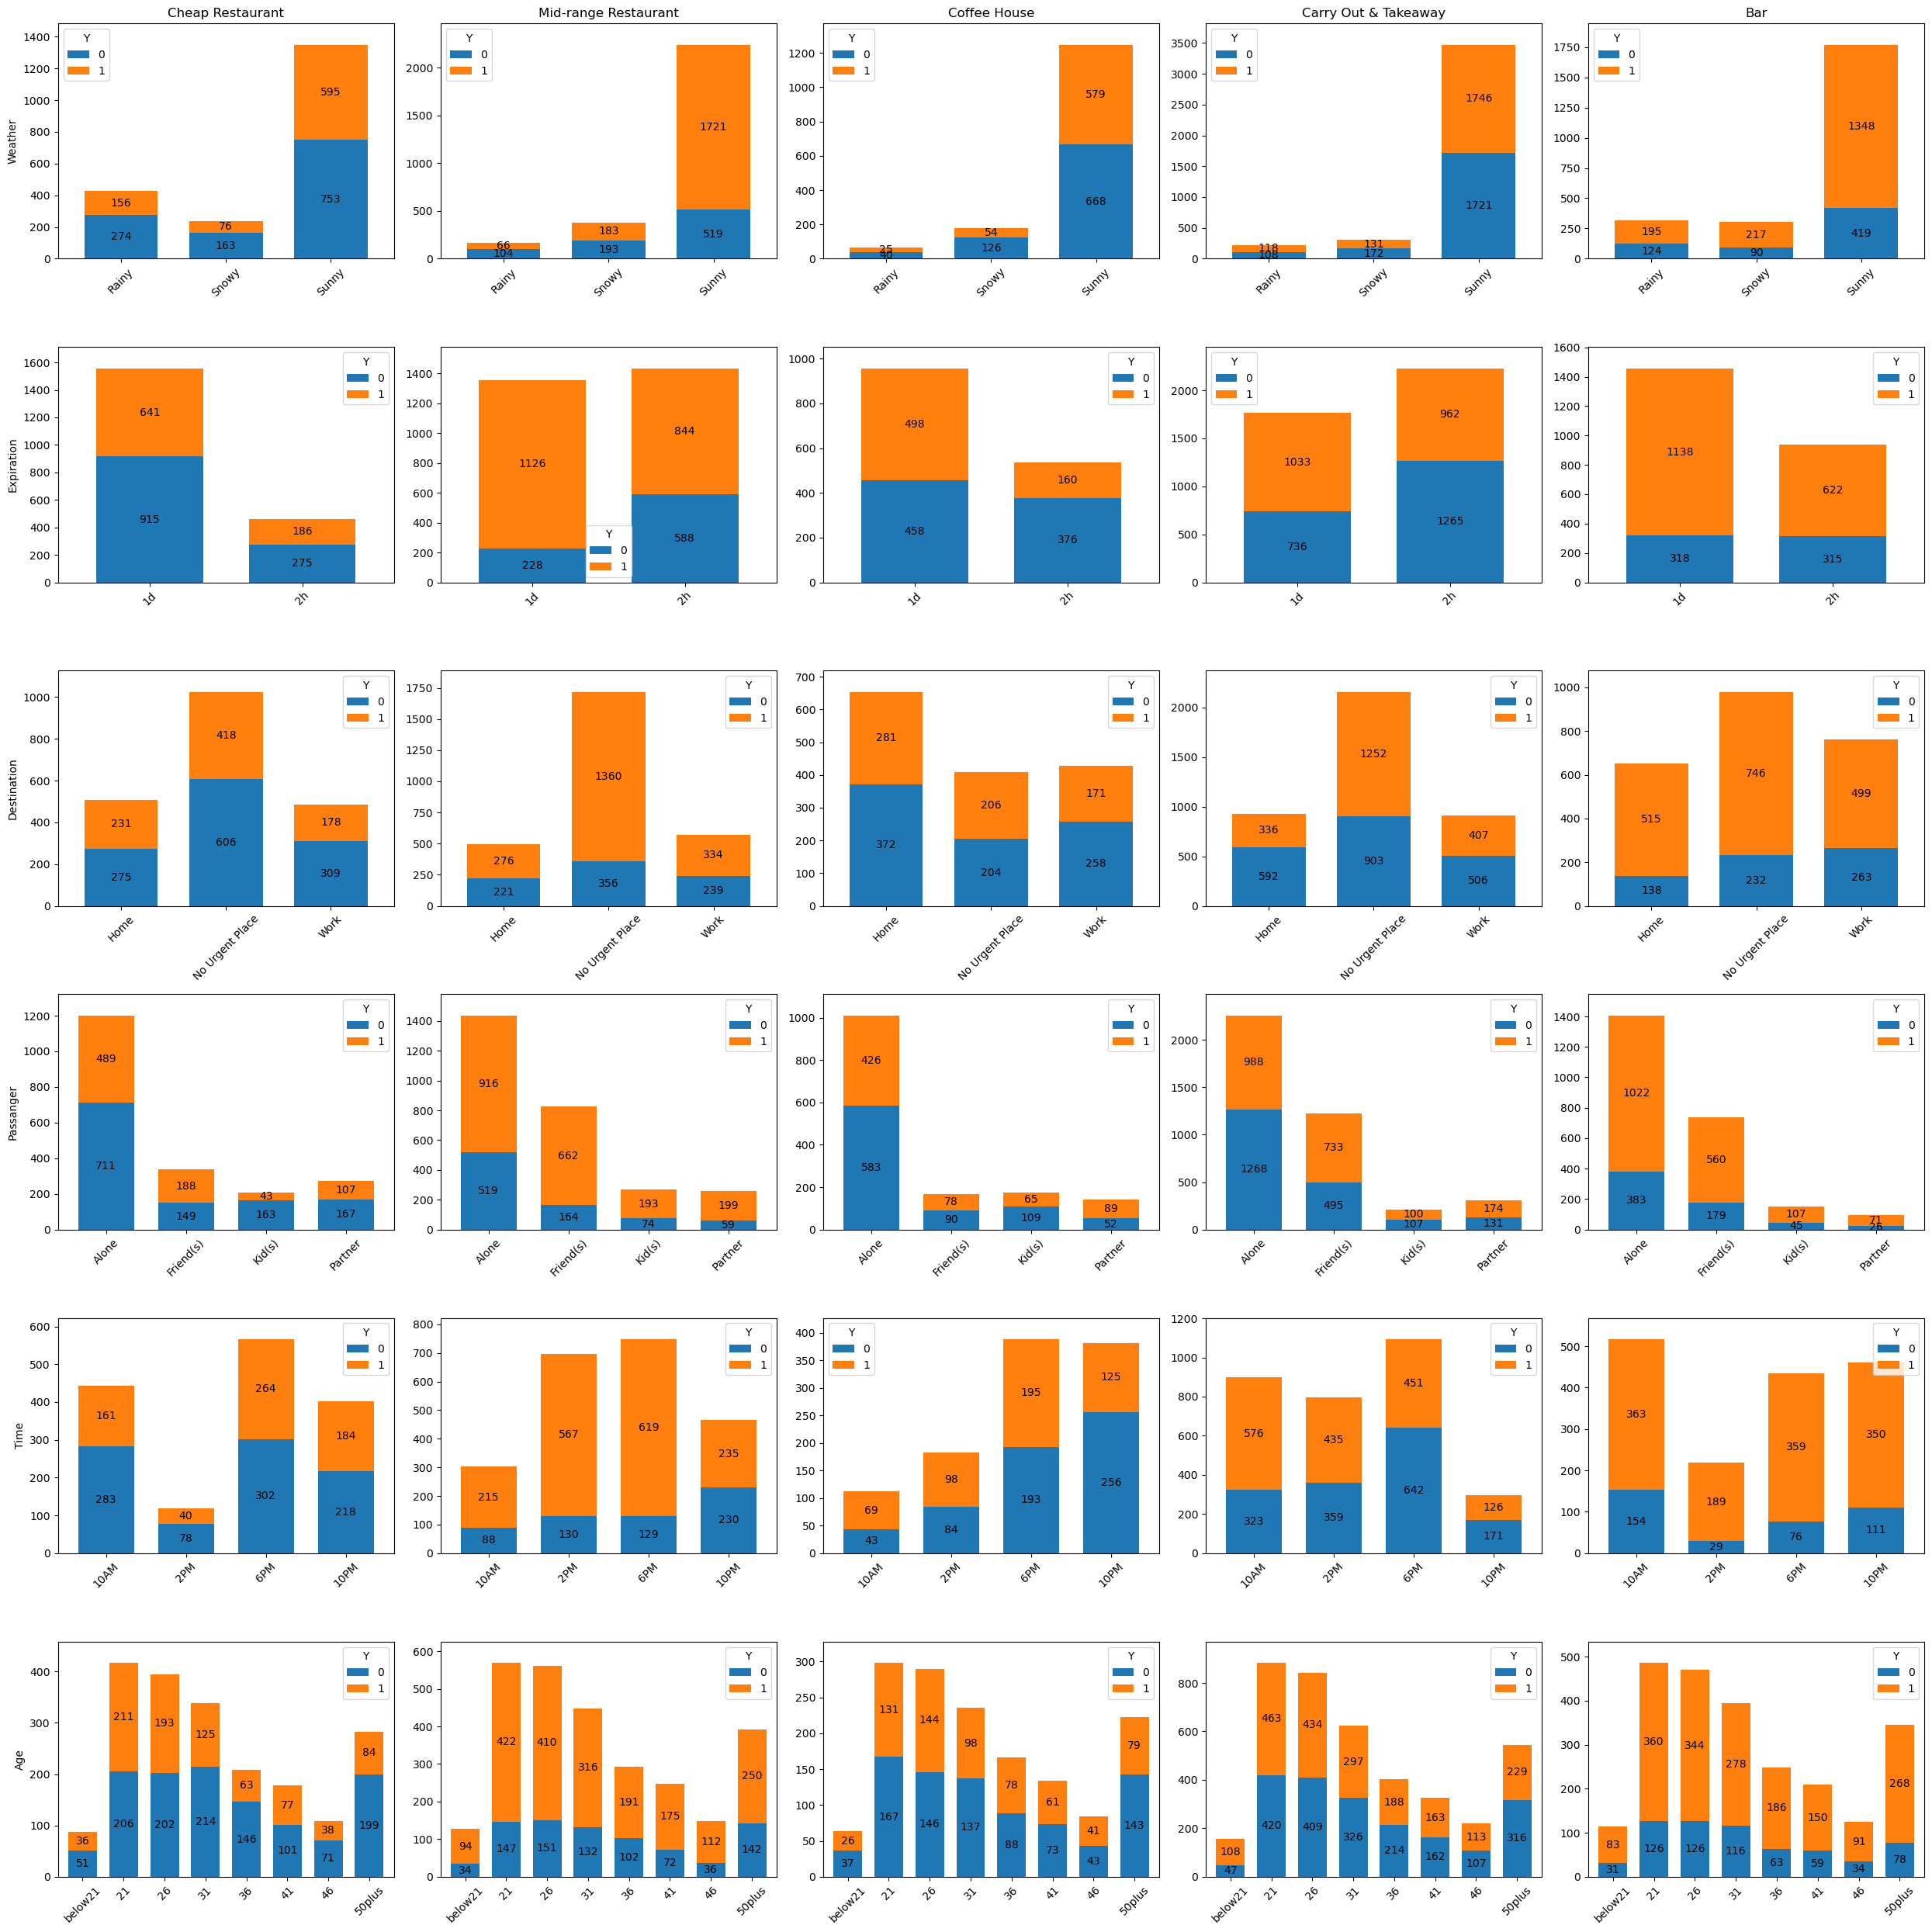

In [51]:
# Will just plot the counts of accepted vs. ignored coupons against all these attributes for all the attributes...

# Attributes to explore
attributes = ['weather', 'expiration', 'destination', 'passanger', 'time', 'age']
df_names = ['Cheap Restaurant', 'Mid-range Restaurant', 'Coffee House', 'Carry Out & Takeaway', 'Bar']

# Define the correct order for time
time_order = ['10AM', '2PM', '6PM', '10PM']
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Create a figure with 5 rows and 4 columns
fig, axes = plt.subplots(6, 5, figsize = (25, 25), sharey = False)  # Setting 'sharey = False' to fit all the bars... they wouldn't otherwise

# Iterate through each attribute and each dataframe to plot
for i, attr in enumerate(attributes):
    for j, (coupon_name, df, x_col) in enumerate(df_list):  # Unpack the tuple: coupon_name, df, x_col
        # Ensuring the correct order for the 'time' attribute
        if attr == 'time':
            df[attr] = pd.Categorical(df[attr], categories = time_order, ordered = True)
        if attr == 'age':
            df[attr] = pd.Categorical(df[attr], categories = age_order, ordered = True)
        
        # Grouping by contextual attribute from the list 'attributes' above and by coupon acceptance
        # Converting to DFs that count acceptance (Y == 1) and rejections (Y == 0)) + handling missing values
        data_grouped = df.groupby([attr, 'Y'], observed = True).size().unstack(fill_value=0)  # Without 'observed = True' I was getting a warning

        # Calculating the acceptance probabilities and filling NAs with 0s
        prob_attr = data_grouped.div(data_grouped.sum(axis = 1), axis = 0)[1]
        prob_attr = prob_attr.fillna(0)

        # Plotting stacked bar chart using matplotlib
        data_grouped.plot(kind = 'bar', stacked = True, ax = axes[i, j], width = 0.7)

        # Annotating the bar heights by placing text in the center of each bar
        for p in axes[i, j].patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            if height > 0:
                axes[i, j].annotate(f'{height:.0f}', (x + width / 2, y + height / 2), 
                                    ha = 'center', va = 'center', fontsize = 10, color = 'black')

        # Setting titles and labels
        if i == 0:
            axes[i, j].set_title(f'{df_names[j]}')
        if j == 0:
            axes[i, j].set_ylabel(f'{attr.capitalize()}')

        # Dynamically adjusting y-axis to fit all bars
        max_value = data_grouped.sum(axis = 1).max()
        axes[i, j].set_ylim(0, max_value * 1.1)  # Adding 10% margin to the y-axis to ensure proper fit
        
        axes[i, j].set_xlabel('')  # Removing x-axis label
        axes[i, j].tick_params(axis = 'x', rotation = 45)  # Rotating x-ticks for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()